In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
path = os.path.dirname('/home/ps/Documents/Batteries/Data/')  # EDIT HERE
filename = 'batch1.pkl'
file_path = os.path.join(path, filename)

In [3]:
batch1 = pickle.load(open(file_path, 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [4]:
print(batch1.keys())

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])


In [5]:
numBat1 = len(batch1.keys())
numBat1

41

In [6]:
filename = 'batch2.pkl'
file_path = os.path.join(path, filename)
batch2 = pickle.load(open(file_path, 'rb'))

In [7]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [8]:
for key, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[key]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[key]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[key]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[key]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[key]]['cycles'][jk]

In [9]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [10]:
numBat2 = len(batch2.keys())
numBat2

43

In [11]:
filename = 'batch3.pkl'
file_path = os.path.join(path, filename)
batch3 = pickle.load(open(file_path, 'rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [12]:
numBat3 = len(batch3.keys())
numBat3

40

In [13]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [14]:
bat_dict = {**batch1, **batch2, **batch3}

In [15]:
# Export all batch data into a pickle file.
pickle_file = os.path.join(path, 'batchdata_all.pkl')
fp = open(file=pickle_file, mode='wb')
pickle.dump(bat_dict, file=fp)
fp.close()

Text(0, 0.5, 'Discharge Capacity (Ah)')

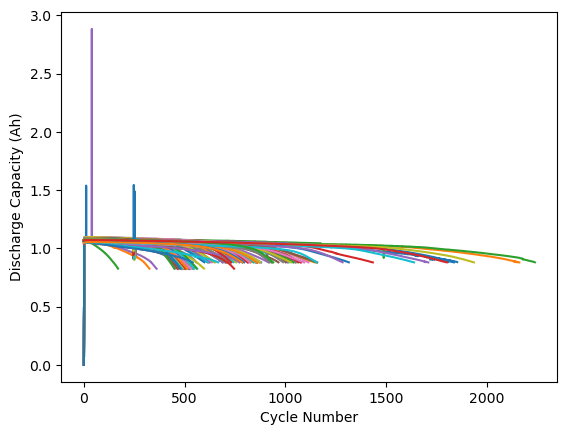

In [16]:
for key in bat_dict.keys():
    plt.plot(bat_dict[key]['summary']['cycle'], bat_dict[key]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

# Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [17]:
val_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
test_ind = np.arange(numBat-numBat3,numBat);

In [18]:
print(len(train_ind), len(val_ind), len(test_ind))

41 43 40


In [19]:
keys_array = list(bat_dict.keys())
valData = {keys_array[i]: bat_dict[keys_array[i]] for i in val_ind}
trainData = {keys_array[i]: bat_dict[keys_array[i]] for i in train_ind}
testData = {keys_array[i]: bat_dict[keys_array[i]] for i in test_ind}

In [20]:
print(trainData.keys())
print(trainData['b1c1'].keys())
print(trainData['b1c1']['cycles'].keys())
print(trainData['b1c1']['cycles']['0'].keys())
print(trainData['b1c1']['summary'].keys())

dict_keys(['b1c1', 'b1c3', 'b1c5', 'b1c7', 'b1c11', 'b1c15', 'b1c17', 'b1c19', 'b1c21', 'b1c24', 'b1c26', 'b1c28', 'b1c30', 'b1c32', 'b1c34', 'b1c36', 'b1c38', 'b1c40', 'b1c42', 'b1c44', 'b2c0', 'b2c2', 'b2c4', 'b2c6', 'b2c11', 'b2c13', 'b2c17', 'b2c19', 'b2c21', 'b2c23', 'b2c25', 'b2c27', 'b2c29', 'b2c31', 'b2c33', 'b2c35', 'b2c37', 'b2c39', 'b2c41', 'b2c43', 'b2c45'])
dict_keys(['Vdlin', 'cycle_life', 'charge_policy', 'summary', 'cycles'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '